In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df = pd.read_csv('data/BlackFriday.csv')

# Data Exploration

In [33]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [35]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


# Variable Analysis

In [36]:
# Functions

# Reliza un gráfico dadas dos variables y el tipo de gráfico a realizar
def plt_plot(group, column, plot):
    ax = plt.figure(figsize = (12, 6))
    df.groupby(group)[column].sum().sort_values().plot(plot)
    
def sns_plot(column):
    sns.countplot(df[column])
    
def sort_descending_df_head(group, column, count_head):
    group.sort_values(column, ascending=False, inplace=True)
    return group.head(count_head)

## User

In [38]:
# Cantidad de usuarios que compraron en total
df["User_ID"].nunique()

5891

## Purchase

In [73]:
# Cantidad de plata recaudada por las ventas
df['Purchase'].sum()

5017668378

## Product

In [39]:
product_df = df.copy()
# Cantidad de productos diferentes
print("Product amount: ", len(product_df["Product_ID"].value_counts()))

Product amount:  3623


In [40]:
# Dinero promedio gastado por producto
product_purchase_mean = product_df[['Product_ID', 'Purchase']].groupby("Product_ID").mean().reset_index()
product_purchase_sum = product_df[['Product_ID', 'Purchase']].groupby("Product_ID").sum().reset_index()
product_purchase_count = product_df[['Product_ID', 'Purchase']].groupby("Product_ID").count().reset_index()

In [41]:
sort_descending_df_head(product_purchase_mean, "Purchase", 10)

,Product_ID,Purchase
834,P00086242,21297.865672
825,P00085342,20993.804428
1900,P00200642,20479.229885
1068,P00116142,20478.264753
1100,P00119342,20454.296053
1083,P00117642,20453.368557
724,P00074542,20323.000000
3273,P00341542,20291.000000
519,P00052842,20136.811983
842,P00087042,20079.646809


In [42]:
sort_descending_df_head(product_purchase_sum, "Purchase", 10)

,Product_ID,Purchase
249,P00025442,27532426
1014,P00110742,26382569
2441,P00255842,24652442
1743,P00184942,24060871
581,P00059442,23948299
1028,P00112142,23882624
1016,P00110942,23232538
2261,P00237542,23096487
565,P00057642,22493690
104,P00010742,21865042


In [43]:
sort_descending_df_head(product_purchase_count, "Purchase", 10)

,Product_ID,Purchase
2534,P00265242,1858
1014,P00110742,1591
249,P00025442,1586
1028,P00112142,1539
565,P00057642,1430
1743,P00184942,1424
458,P00046742,1417
568,P00058042,1396
1353,P00145042,1384
581,P00059442,1384


## Gender

In [44]:
# Cantidad de Hombres y Mujeres unicos que compraron
gender_df = df.copy()
gender_unique = gender_df.groupby(['User_ID','Gender'])['Gender'].count().groupby(['Gender']).count()
gender_unique

Gender
F    1666
M    4225
Name: Gender, dtype: int64

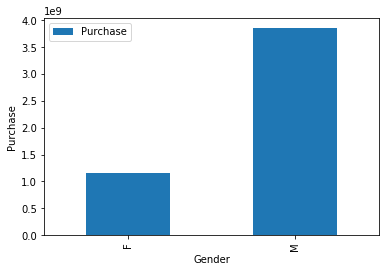

In [45]:
# Cantidad total de $ recaudados por cada genero.
gender_purchase_total = gender_df[['Gender', 'Purchase']].groupby("Gender").sum()
gender_purchase_total.plot.bar()

sns.barplot("Gender", "Purchase", data = gender_df)
plt.show()

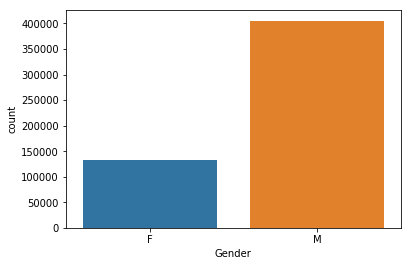

In [10]:
sns_plot("Gender")

In [11]:
# Cantidad de compras realizadas por Hombres (M) y Mujeres (F)
df['Gender'].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

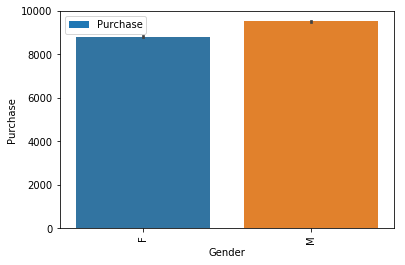

In [12]:
# Dinero promedio gastado por genero
gender_df = df.copy()
gender_purchase_merge = gender_df[['Gender', 'Purchase']].groupby("Gender").mean()
gender_purchase_merge.plot.bar()

sns.barplot("Gender", "Purchase", data = gender_df)
plt.show()

In [13]:
gender_purchase_merge

,Purchase
Gender,
F,8809.761349
M,9504.771713


## Age

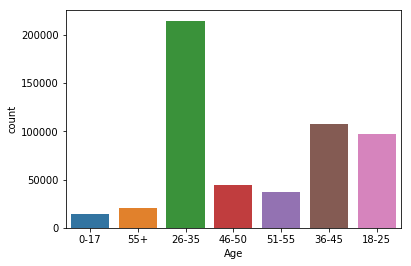

In [20]:
age_data_frame = df.copy()
# Cantidad de registros de compra que hay por edad.
sns.countplot(age_data_frame["Age"])

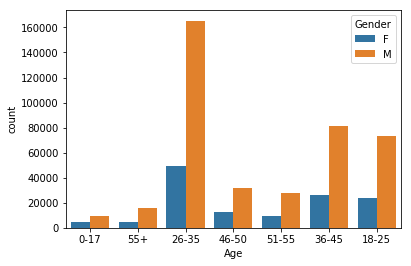

In [21]:
# Cantidad de registros de compra por edad separado por el genero.
sns.countplot(age_data_frame["Age"], hue=age_data_frame["Gender"])

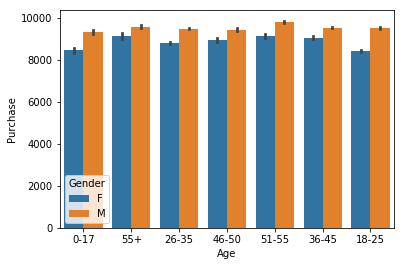

In [22]:
# Promedio de compra por edad y genero.
sns.barplot(x="Age", y="Purchase", hue="Gender", data=age_data_frame)

In [23]:
# La suma total de compras en dolares por rango de edad.
age_data_frame.pivot_table('Purchase', ['Age'], aggfunc=np.sum)

,Purchase
Age,
0-17,132659006
18-25,901669280
26-35,1999749106
36-45,1010649565
46-50,413418223
51-55,361908356
55+,197614842


In [24]:
# Cantidad unica de usuarios por rango de edad.
age_data_frame = age_data_frame.groupby('Age')['User_ID'].nunique()
age_data_frame

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

## Occupation

In [65]:
occupation_df = df.copy()

In [70]:
# Cantidad de usuarios por ocupacion.
users_in_occupation = occupation_df.groupby('Occupation')['User_ID'].nunique()
users_in_occupation.sort_values(ascending=False)

Occupation
4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
13    140
15    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: User_ID, dtype: int64

In [71]:
# La cantidad de compras, el total de dolares recaudados y el promedio de compra por ocupacion.
occupation_purchases = occupation_df.groupby('Occupation')['Purchase'].agg(['sum', 'count', 'mean'])
occupation_purchases.sort_values('sum', ascending=False)

,sum,count,mean
Occupation,,,
4,657530393,70862,9279.026742
0,625814811,68120,9186.946726
7,549282744,57806,9502.175276
1,414552829,45971,9017.703095
17,387240355,39090,9906.378997
12,300672105,30423,9883.052460
20,292276985,32910,8881.099514
14,255594745,26712,9568.536426
16,234442330,24790,9457.133118


In [72]:
# La cantidad de usuarios que compraron por ocupacion y ciudad.
users_in_occupation = occupation_df.groupby(['Occupation', 'City_Category'])['User_ID'].nunique()
users_in_occupation

Occupation  City_Category
0           A                129
            B                203
            C                356
1           A                 94
            B                140
            C                283
2           A                 68
            B                 80
            C                108
3           A                 34
            B                 47
            C                 89
4           A                172
            B                236
            C                332
5           A                 14
            B                 40
            C                 57
6           A                 24
            B                 74
            C                130
7           A                113
            B                170
            C                386
8           A                  4
            B                  2
            C                 11
9           A                  7
            B                 25
            C    

Podemos notar como las ocupaciones con mas usuarios que compran y con mas compras y gastos son las personas con las ocupaciones 4, 0 y 7. Por lo que en el proximo black-friday, la tienda podria armar anuncions especificos para la gente con esas ocupaciones para aumentar mas las ganancias. 
Ademas tenemos las divisiones de ciudad con la cantidad de gente y ocupaciones que hay por cada una por lo que puede servir para saber en que ocupacion enfocarse por ciudad.

In [34]:
# Cantidad de registros por ocupacion
df["Occupation"].value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

In [61]:
occupation_df.drop(['User_ID', 'Marital_Status', 'Product_Category_2', 'Product_Category_3', 'Stay_In_Current_City_Years', 'Product_ID', 'City_Category'], axis=1, inplace=True)
occupation_df = occupation_df.groupby(["Occupation", "Product_Category_1"]).sum().reset_index()
occupation_df

,Occupation,Product_Category_1,Purchase
0,0,1,231782393
1,0,2,32948881
2,0,3,26167650
3,0,4,3482490
4,0,5,115849222
5,0,6,39801649
6,0,7,8894329
7,0,8,103444552
8,0,9,754498
9,0,10,12280732


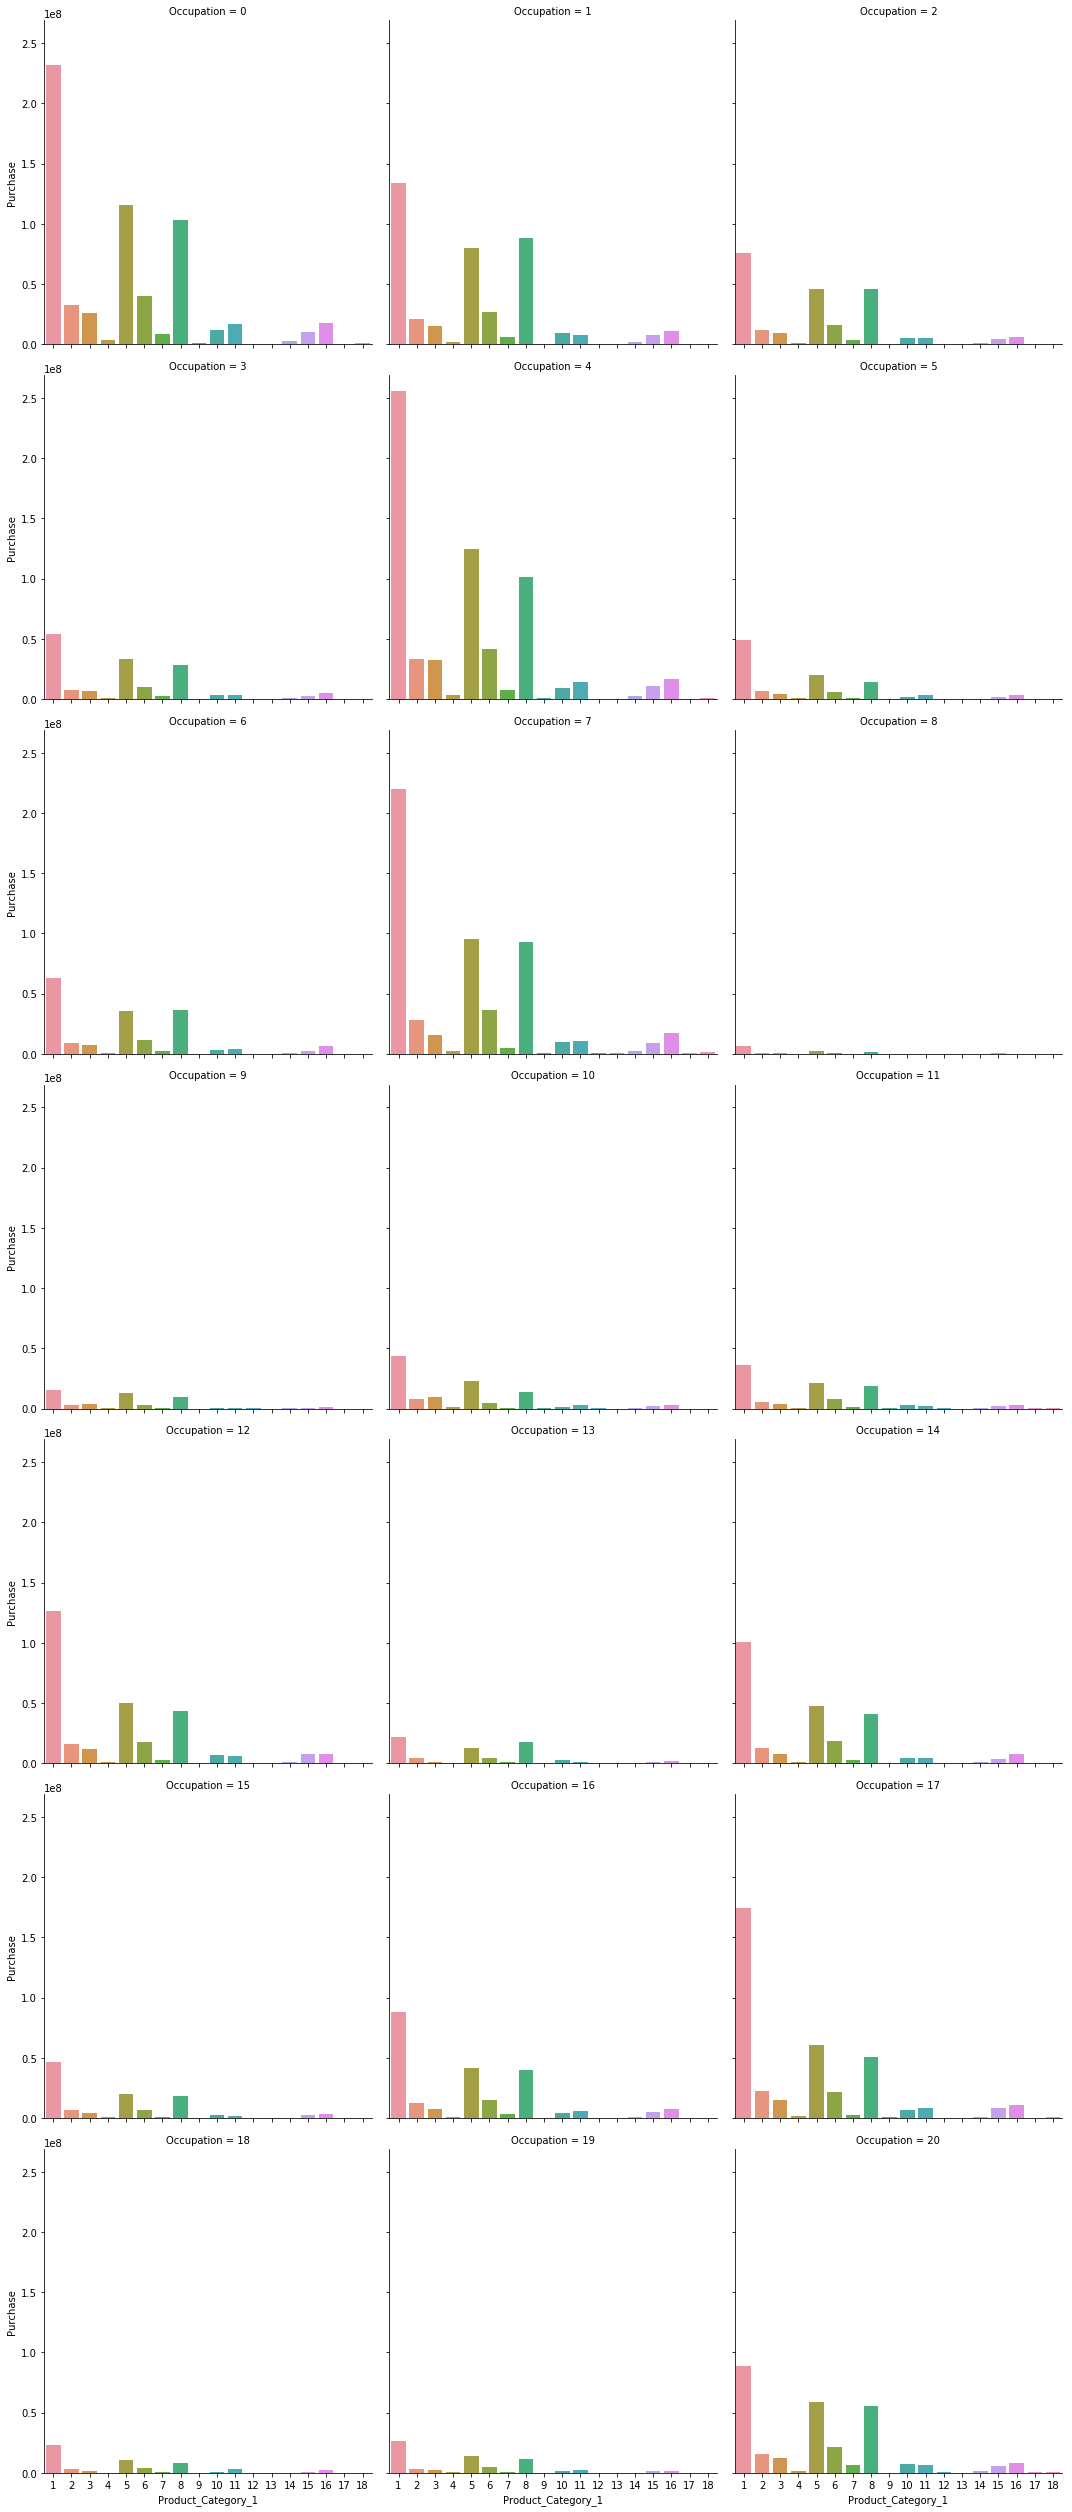

In [75]:
# Cantidad de dinero gastado por categoría, por cada ocupación.
sns.catplot(x='Product_Category_1', y='Purchase', col="Occupation", col_wrap=3, data=occupation_df, kind="bar")

Reflexión: Los datos muestran que las personas con ocupación 0, 1, 4, 7 y 17 gastan más dinero en productos de la categoría 1. Mientras que ninguna ocupación gasta en demasiado en productos de las categorías 4, 7, 9-18.

## City Category

In [59]:
city_df = df.copy()

In [60]:
# Cantidad de compras realizadas por ciudad y la cantidad de plata recaudada.
city_purchase = city_df.groupby('City_Category')['Purchase'].agg(['sum', 'count'])
city_purchase

,sum,count
City_Category,,
A,1295668797,144638
B,2083431612,226493
C,1638567969,166446


In [61]:
city_user = city_df.groupby('City_Category')['User_ID'].nunique()
city_user

City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64

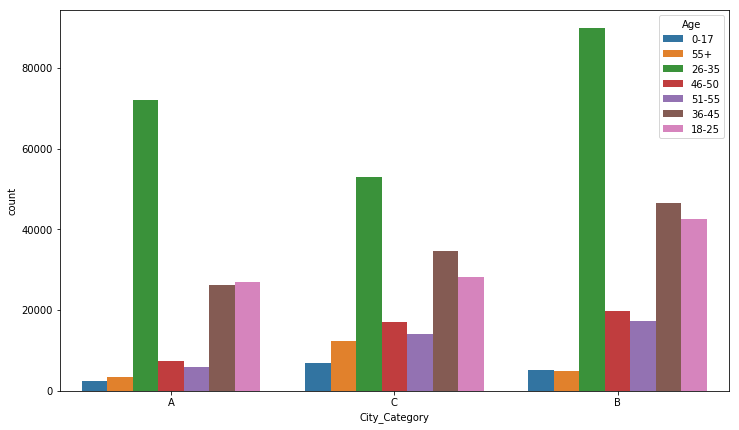

In [20]:
# Cantidad total de compras por edad y por ciudad
fig1, ax1 = plt.subplots(figsize = (12, 7))
sns.countplot(df['City_Category'], hue = df["Age"])

Reflexión: Personas del rango de edad de 17- y 55+, prefieren comprar en la ciudad C. Mientras que el resto prefiere comprar en la ciudad B.

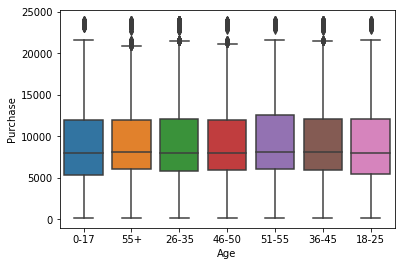

In [22]:
sns.boxplot('Age','Purchase', data = df)
plt.show()

Reflexión: Sin importar la edad, la cantidad de dinero gastado se mantiene constante.

## Stay In Current City Years

In [62]:
stay_years_df = df.copy()

In [64]:
years_user = stay_years_df.groupby(['City_Category', 'Stay_In_Current_City_Years'])['User_ID'].nunique()
years_user

City_Category  Stay_In_Current_City_Years
A              0                              147
               1                              370
               2                              183
               3                              180
               4+                             165
B              0                              211
               1                              608
               2                              342
               3                              295
               4+                             251
C              0                              414
               1                             1108
               2                              620
               3                              504
               4+                             493
Name: User_ID, dtype: int64

In [180]:
df["Stay_In_Current_City_Years"].value_counts()

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

## Marital Status

In [181]:
df["Marital_Status"].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

In [46]:
marital_status_df = df.copy()
marital_gender_df = marital_status_df.groupby(['Gender', 'Marital_Status']).size()
marital_gender_df

Gender  Marital_Status
F       0                  76974
        1                  55223
M       0                 240843
        1                 164537
dtype: int64

In [51]:
marital = marital_status_df.groupby(['Marital_Status', 'Gender']).sum()
marital.drop(['User_ID', 'Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'], axis=1)

Purchase
Marital_Status Gender            
0              F        673815717
               M       2292473783
1              F        490808304
               M       1560570574

## Product Category

In [86]:
product_category_df = df.copy()
product_category_df['Product_Category_2'].fillna(-1, inplace=True)
product_category_df['Product_Category_3'].fillna(-1, inplace=True)
product_category_df["Product_Category_2"] = product_category_df["Product_Category_2"].astype(np.int64)
product_category_df["Product_Category_3"] = product_category_df["Product_Category_3"].astype(np.int64)
product_category_df.drop(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Stay_In_Current_City_Years'], axis=1, inplace=True)
product_category_df.sort_values(["Product_Category_1", "Product_Category_2", "Product_Category_3"], inplace=True)
product_category_df.head(15000)

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
86,1,-1,-1,19525
260,1,-1,-1,3978
519,1,-1,-1,7836
524,1,-1,-1,8289
533,1,-1,-1,11670
547,1,-1,-1,19464
549,1,-1,-1,19394
556,1,-1,-1,8310
635,1,-1,-1,15181
643,1,-1,-1,11971


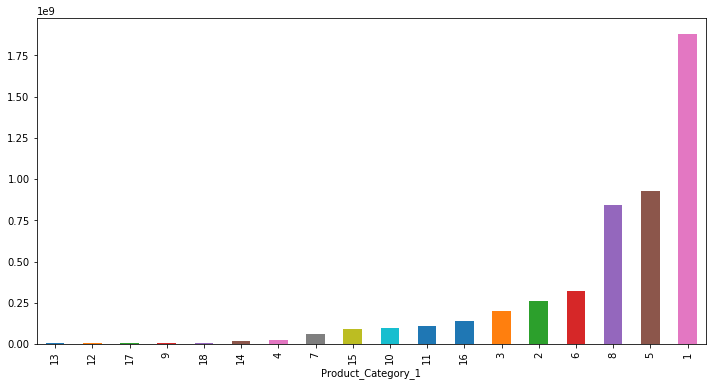

In [103]:
# Cantidad de dinero gastado por la categoría 1
plt_plot("Product_Category_1", "Purchase", "bar")

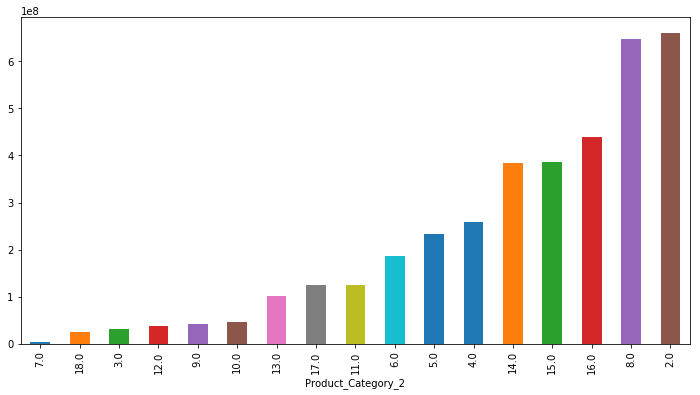

In [104]:
# Cantidad de dinero gastado por la categoría 2
plt_plot("Product_Category_2", "Purchase", "bar")

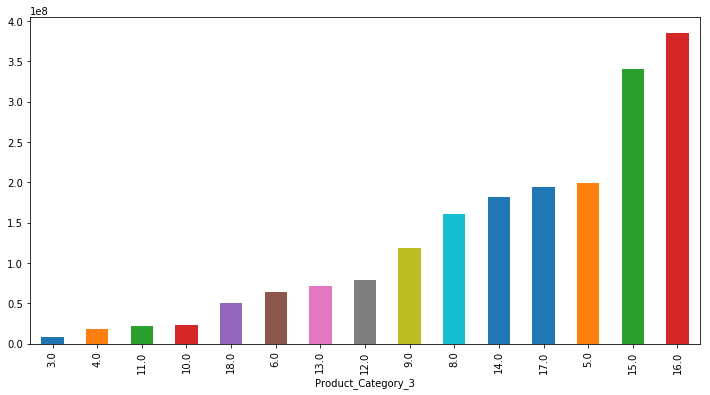

In [105]:
# Cantidad de dinero gastado por la categoría 3
plt_plot("Product_Category_3", "Purchase", "bar")

In [160]:
product_category_1_df = product_category_df.drop(["Product_Category_2", "Product_Category_3"], axis=1)
product_category_2_df = product_category_df.drop(["Product_Category_1", "Product_Category_3"], axis=1)
product_category_3_df = product_category_df.drop(["Product_Category_1", "Product_Category_2"], axis=1)

product_category_2_df = product_category_2_df[product_category_2_df["Product_Category_2"] != -1]
product_category_3_df = product_category_3_df[product_category_3_df["Product_Category_3"] != -1]

In [162]:
category_sum = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0}
category_count = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0}

def sum_category_purchases(dataframe, category_dict):
    for i in range(len(dataframe)):
        category_number = dataframe.iloc[i][0]
        category_dict[category_number] = category_dict.get(category_number) + dataframe.iloc[i][1]
        
        

In [163]:
# Cantidad de productos comprados por categoría
count_product_category_1_df = product_category_1_df.groupby("Product_Category_1").count().reset_index()
count_product_category_2_df = product_category_2_df.groupby("Product_Category_2").count().reset_index()
count_product_category_3_df = product_category_3_df.groupby("Product_Category_3").count().reset_index()

sum_category_purchases(count_product_category_1_df, category_count)
sum_category_purchases(count_product_category_2_df, category_count)
sum_category_purchases(count_product_category_3_df, category_count)
    
category_count

{1: 138353,
 2: 71980,
 3: 23284,
 4: 38632,
 5: 190846,
 6: 41233,
 7: 4283,
 8: 187574,
 9: 17409,
 10: 9721,
 11: 39678,
 12: 18388,
 13: 21194,
 14: 73779,
 15: 71131,
 16: 84447,
 17: 30146,
 18: 10368}

In [164]:
# Cantidad de dinero gastado por categoría
sum_product_category_1_df = product_category_1_df.groupby("Product_Category_1").sum().reset_index()
sum_product_category_2_df = product_category_2_df.groupby("Product_Category_2").sum().reset_index()
sum_product_category_3_df = product_category_3_df.groupby("Product_Category_3").sum().reset_index()

sum_category_purchases(sum_product_category_1_df, category_sum)
sum_category_purchases(sum_product_category_2_df, category_sum)
sum_category_purchases(sum_product_category_3_df, category_sum)
    
category_sum

{1: 1882666325,
 2: 924892852,
 3: 240622236,
 4: 302687109,
 5: 1359327029,
 6: 569799825,
 7: 64288708,
 8: 1650163809,
 9: 166037845,
 10: 168818801,
 11: 258286867,
 12: 122287396,
 13: 175213226,
 14: 586772150,
 15: 818885569,
 16: 967125644,
 17: 323158299,
 18: 84849167}

Reflexión: Los productos de categoría 1 son los más caros, por eso es que juntan más plata, no por que se venda más cantidad.

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

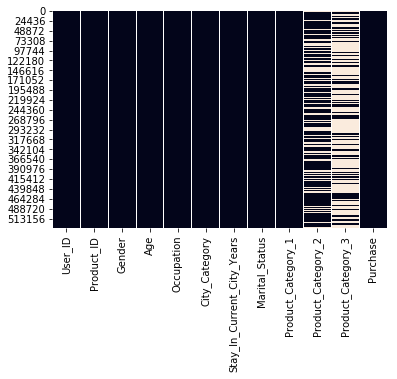

In [150]:
sns.heatmap(df.isnull(), cbar=False)
df.isnull().sum()

# TERMINO DE ANALISIS DE DATOS

In [135]:
df_pred = pd.read_csv('data/BlackFriday.csv')

In [151]:
# Transform categorical to numerical data

In [136]:
df_pred['Age'] = df_pred['Age'].map({'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6})

df_pred['Gender'] = df_pred['Gender'].map({'M': 0,'F': 1})

df_pred['City_Category'] = df_pred['City_Category'].map({'A': 0,'B': 1,'C': 2})

df_pred['Stay_In_Current_City_Years'] = df_pred['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4})

In [137]:
cols = ['User_ID','Product_ID']
df_pred.drop(cols, inplace = True, axis =1)
df_pred.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,10,0,2,0,3,NaN,NaN,8370
1,1,0,10,0,2,0,1,6.0,14.0,15200
2,1,0,10,0,2,0,12,NaN,NaN,1422
3,1,0,10,0,2,0,12,14.0,NaN,1057
4,0,6,16,2,4,0,8,NaN,NaN,7969


In [138]:
df_pred = df_pred.dropna()
df_pred.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1,0,10,0,2,0,1,6.0,14.0,15200
6,0,4,7,1,2,1,1,8.0,17.0,19215
13,0,2,20,0,1,1,1,2.0,5.0,15665
14,1,5,9,0,1,0,5,8.0,14.0,5378
16,1,5,9,0,1,0,2,3.0,4.0,13055


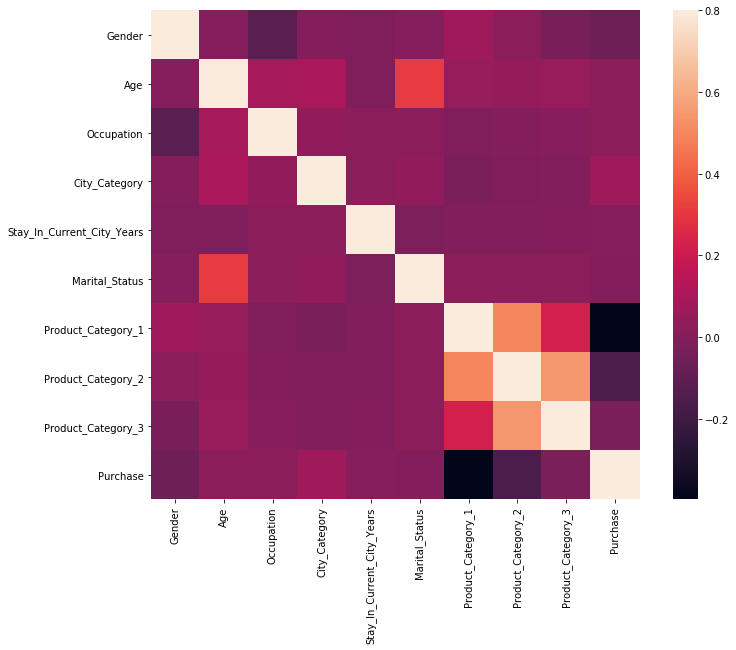

In [139]:
corrmat = df_pred.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

Podemos ver como la edad y el status_marital estan bastante relacionadas cosas que es algo logico.

Pero tambien podemos ver algunas entre las categorias.
Relacion entre la categoria 1:
    - 2 es muy fuerte
    - 3 es muy buena tambien

Relacion entre la categoria 2 y 3 es bastante buena tambien, de hecho mas que la relacion entre la categoria 1 y 2.

Podemos decir que estas relaciones nos dicen que dependiendo de la categoria que compras, normalmente los usuarios repetiran las categorias. 

Podriamos trabajar con un clasificador o algun tipo de algoritmo para predecir que categoria se va a comprar a partir de la que ya eligieron.

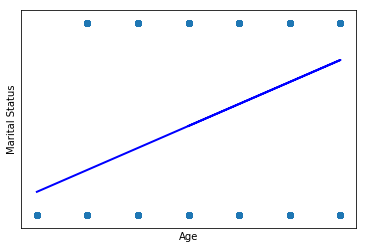

In [143]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = df_pred['Age'].values
y = df_pred['Marital_Status'].values

x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

reg = LinearRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='blue', linewidth=2)
plt.xlabel("Age")
plt.ylabel("Marital Status")
plt.xticks(())
plt.yticks(())
plt.show()

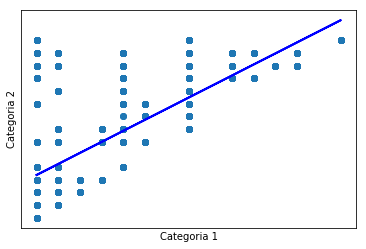

In [140]:
x = df_pred['Product_Category_1'].values
y = df_pred['Product_Category_2'].values

x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

reg = LinearRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='blue', linewidth=2)
plt.xlabel("Categoria 1")
plt.ylabel("Categoria 2")
plt.xticks(())
plt.yticks(())
plt.show()

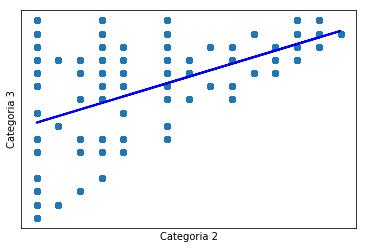

In [141]:
x = df_pred['Product_Category_2'].values
y = df_pred['Product_Category_3'].values

x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

reg = LinearRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='blue', linewidth=2)
plt.xlabel("Categoria 2")
plt.ylabel("Categoria 3")
plt.xticks(())
plt.yticks(())
plt.show()

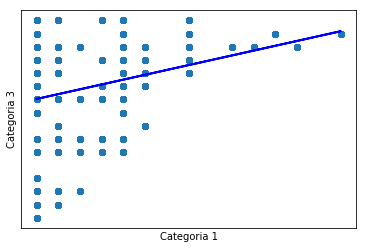

In [142]:
x = df_pred['Product_Category_1'].values
y = df_pred['Product_Category_3'].values

x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

reg = LinearRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='blue', linewidth=2)
plt.xlabel("Categoria 1")
plt.ylabel("Categoria 3")
plt.xticks(())
plt.yticks(())
plt.show()

In [166]:
# Clean null values (these are transformed to zero) and cast to int64

In [167]:
df['Product_Category_2'].fillna(-1, inplace=True)
df['Product_Category_3'].fillna(-1, inplace=True)
df["Product_Category_2"] = df["Product_Category_2"].astype(np.int64)
df["Product_Category_3"] = df["Product_Category_3"].astype(np.int64)

In [168]:
# Check new variable types

In [172]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 11 columns):
User_ID                       537577 non-null int64
Gender                        537577 non-null int64
Age                           537577 non-null int64
Occupation                    537577 non-null int64
City_Category                 537577 non-null int64
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int64
Product_Category_3            537577 non-null int64
Purchase                      537577 non-null int64
dtypes: int64(11)
memory usage: 45.1 MB


,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,1,0,10,0,2,0,3,-1,-1,8370
1,1000001,1,0,10,0,2,0,1,6,14,15200
2,1000001,1,0,10,0,2,0,12,-1,-1,1422
3,1000001,1,0,10,0,2,0,12,14,-1,1057
4,1000002,0,6,16,2,4,0,8,-1,-1,7969


In [171]:
# Create training and testing vars (~20% test)

In [23]:
from sklearn.model_selection import train_test_split
target = df["Purchase"]
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)
# train, test = train_test_split(dfCopy, test_size=0.2)

In [24]:
print("Train set length: ", len(train))
print("Test set length: ", len(test))

NameError: name 'train' is not defined

In [ ]:
# Cross Validation

In [ ]:
# PCA for dimensionality reduction 

In [ ]:
from sklearn.decomposition import PCA
pc = PCA(4) # number of components wanted
principalComponents = pc.fit_transform(dfCopy)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents, columns = ["component 1", "component 2", "component 3", "component 4"])

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(20)

In [ ]:
# fit a model
from sklearn import datasets, linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [ ]:
model.score(X_test, y_test)